In [1]:
import pandas as pd
from sympy.printing.tensorflow import tensorflow
from json import load
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.models import load_model
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV, KFold
from tensorflow.keras.optimizers import Adam



In [2]:
# Define the URL from which to fetch the CSV data.
url = 'Exercise7BikeSharing.csv'

# Use pandas to read the CSV data from the specified URL and store it in a DataFrame 'df'.
#df = pd.read_csv(url)
# Display the first 10 rows of the DataFrame 'df'.y

df = pd.read_csv('Exercise7BikeSharing.csv')
df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [3]:
# Copy df so we don't touch the original
df_extended = df.copy()

# Add new engineered features
df_extended["hr_workingday"] = df_extended["hr"] * df_extended["workingday"]
df_extended["weathersit_hum"] = df_extended["weathersit"] * df_extended["hum"]

# Define features and target
features_extended = [ 'temp','atemp','hum','windspeed','weathersit', 'hr','weekday','workingday','holiday','season','yr','hr_workingday', 'weathersit_hum']
target = 'cnt'

X = df_extended[features_extended]
y = df_extended[target].astype(float)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [4]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

gbr = HistGradientBoostingRegressor(
    loss="squared_error",
    learning_rate=0.05,
    max_leaf_nodes=31,
    max_depth=None,
    min_samples_leaf=20,
    random_state=42
)
gbr.fit(X_train, y_train)

y_pred_gbr = gbr.predict(X_test)
gbr_mae = mean_absolute_error(y_test, y_pred_gbr)
gbr_rmse = root_mean_squared_error(y_test, y_pred_gbr)
gbr_r2 = r2_score(y_test, y_pred_gbr)
print(f"[HGBR] Test MAE={gbr_mae:.3f}, RMSE={gbr_rmse:.3f}, R2={gbr_r2:.3f}")


[HGBR] Test MAE=28.370, RMSE=43.422, R2=0.940


In [5]:


#-------------------------------------------------data preprocessing------------------------------------------------------------------


#-------------------------------------------------network construction-----------------------------------------------------------------

#************************************************Here you can choose to add the dropout layer or not***************************
# 
n_features = X_train_scaled.shape[1]

def construct_network_model(n_features, use_dropout=True):
# Create a Sequential model, which is a linear stack of layers.
    model = Sequential()
# Add a Dense layer with 32 units, ReLU activation, and an input dimension of 11.
    model.add(Dense(32, activation='relu', input_dim=13))
# Add another Dense layer with 64 units and ReLU activation.
    model.add(Dense(64, activation='relu'))
# Add a final Dense layer with 1 unit (typically used for regression tasks).
    model.add(Dense(1))
# Compile the model with the Adam optimizer, Mean Absolute Error (MAE) loss function,
# and MAE metric to be used during training.
    model.compile(optimizer='adam', loss='mae', metrics=['mae'])
# Display a summary of the model architecture, including the number of parameters.
    model.summary()

    return(model)

model_new = construct_network_model(n_features, use_dropout=True)
model_new.compile(optimizer='adam', loss='mae', metrics=['mae'])
model_new.summary()

/opt/anaconda3/envs/ai_transport/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,625 (10.25 KB)

 Trainable params: 2,625 (10.25 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,625 (10.25 KB)

 Trainable params: 2,625 (10.25 KB)

 Non-trainable params: 0 (0.00 B)


Epoch 1: val_mae improved from None to 102.88371, saving model to weights.best.keras

Epoch 2: val_mae improved from 102.88371 to 98.69230, saving model to weights.best.keras

Epoch 3: val_mae improved from 98.69230 to 97.24352, saving model to weights.best.keras

Epoch 4: val_mae improved from 97.24352 to 96.23536, saving model to weights.best.keras

Epoch 5: val_mae improved from 96.23536 to 95.45386, saving model to weights.best.keras

Epoch 6: val_mae improved from 95.45386 to 95.08151, saving model to weights.best.keras

Epoch 7: val_mae improved from 95.08151 to 94.32510, saving model to weights.best.keras

Epoch 8: val_mae improved from 94.32510 to 93.09307, saving model to weights.best.keras

Epoch 9: val_mae improved from 93.09307 to 91.90965, saving model to weights.best.keras

Epoch 10: val_mae improved from 91.90965 to 90.59372, saving model to weights.best.keras

Epoch 11: val_mae improved from 90.59372 to 89.26067, saving model to weights.best.keras

Epoch 12: val_mae im

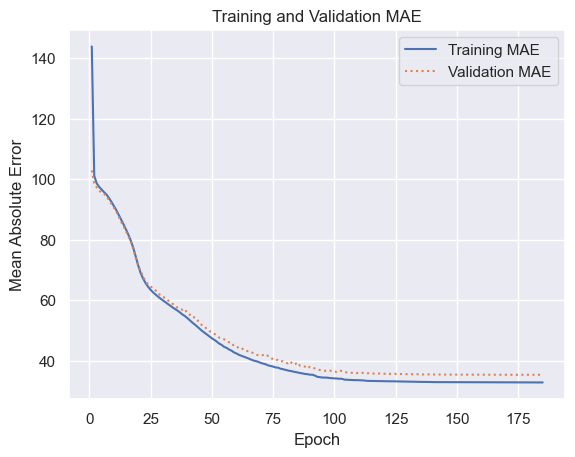

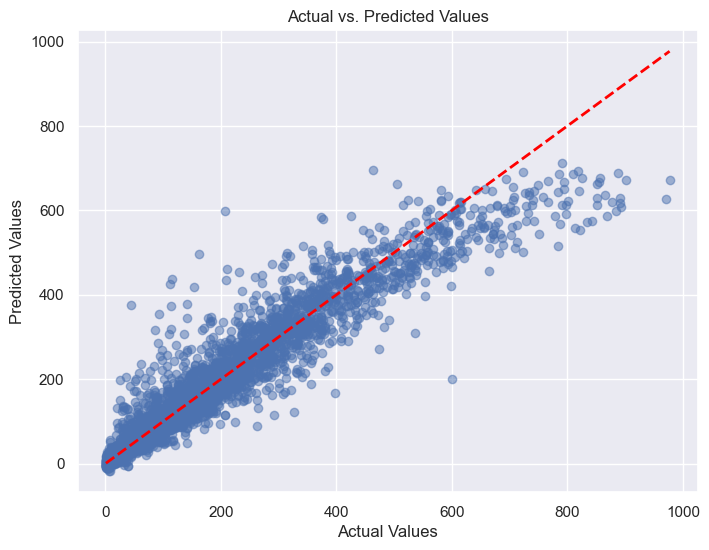

Best params: {'model__dropout': 0.0, 'model__lr': 0.001, 'model__n_hidden': 2, 'model__units': 64}
CV best MAE: 45.11949013426797
GridSearch NN MAE: 38.55351383341487


In [6]:


#************************************************Here you can choose to add the dropout layer or not*****************

#-------------------------------------------------model train------------------------------------------------------------------
# use the callback function to early stop, learning rate ajusting, save the best model
# Create an EarlyStopping callback to monitor the validation mean absolute error (val_mae).
# It will stop training if val_mae doesn't improve for 5 consecutive epochs and restores the best weights.
early_stop = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)

# Create a ReduceLROnPlateau callback to monitor val_mae.
# It reduces the learning rate by a factor of 0.5 if val_mae doesn't improve for 3 consecutive epochs.
reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=3)

# Define the file path where the best model will be saved.
filepath = "weights.best.keras"

# Create a ModelCheckpoint callback to monitor the validation mae (val_mae).
# The callback will save thhe model's weights only if the validation mae improves.
checkpoint = ModelCheckpoint(filepath, monitor='val_mae', verbose=1, save_best_only=True, mode='min')

# Train the model using the fit method.
hist_2_new = model_new.fit(X_train_scaled, y_train, validation_split=0.2, epochs=200, batch_size=32, callbacks=[early_stop, reduce_lr,checkpoint],verbose=0)


#-------------------------------------------------model evaluation--------------------------------------------------------------------

# Set the style of the plots using Seaborn.
sns.set()

# Extract the training and validation Mean Absolute Error (MAE) from the training history.
err = hist_2_new.history['mae']
val_err = hist_2_new.history['val_mae']

# Define the number of epochs.
epochs = range(1, len(err) + 1)

# Plot the Training MAE and Validation MAE over epochs.
plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()

# Use the trained model to predict on the test data.
y_pred = model_new.predict(X_test_scaled)

# Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) for the predictions.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('--------------------------------------'+'this is result of the trained model'+"---------------------------------------------")
# Print the calculated metrics.
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

#-------------------------------------------------load model and evaluation--------------------------------------------------------------------
if not filepath =="":
  # Load a pre-trained model from the specified file path.
  model_new = load_model(filepath)

  # Use the loaded model to predict on the test data.
  y_pred = model_new.predict(X_test_scaled)

  # Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) for the predictions.
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  print('--------------------------------------'+'this is result of the model loaded from the local path'+"---------------------------------------------")

  # Print the calculated metrics.
  print(f"Mean Absolute Error: {mae}")
  print(f"Mean Squared Error: {mse}")
  print(f"R-squared: {r2}")



  # Create a scatter plot to visualize the relationship
  plt.figure(figsize=(8, 6))
  plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs. predicted values

  # Add labels and title
  plt.xlabel("Actual Values")
  plt.ylabel("Predicted Values")
  plt.title("Actual vs. Predicted Values")

  # Add a diagonal line for reference (perfect predictions)
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

  # Show the plot
  plt.show()

def build_ffnn(n_features, n_hidden=1, units=64, lr=1e-3, dropout=0.0):
    model = Sequential()
    model.add(Input(shape=(n_features,)))
    for _ in range(n_hidden):
        model.add(Dense(units, activation="relu"))
        if dropout > 0:
            model.add(Dropout(dropout))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=lr), loss="mae", metrics=["mae"])
    return model

reg = KerasRegressor(
    model=build_ffnn,
    n_features=X_train_scaled.shape[1],
    epochs=80,
    batch_size=64,
    verbose=0
)

param_grid = {
    "model__n_hidden": [1, 2],
    "model__units": [32, 64],
    "model__lr": [1e-3, 3e-4],
    "model__dropout": [0.0, 0.2]
}

cv = KFold(n_splits=3, shuffle=True, random_state=42)
grid = GridSearchCV(reg, param_grid, scoring="neg_mean_absolute_error", cv=cv, n_jobs=-1)
grid.fit(
    X_train_scaled, y_train,
    callbacks=[EarlyStopping(monitor="val_mae", patience=5, restore_best_weights=True)],
    validation_split=0.2
)

print("Best params:", grid.best_params_)
print("CV best MAE:", -grid.best_score_)

# Evaluate on test set
y_pred_nn = grid.predict(X_test_scaled).ravel()
print("GridSearch NN MAE:", mean_absolute_error(y_test, y_pred_nn))


In [7]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

# Calculate the Mean Absolute Error (MAE) between the true and predicted values.
mae_nn = mean_absolute_error(y_test, y_pred)
# Calculate the Root Mean Squared Error (RMSE) between the true and predicted values.
mse_nn = root_mean_squared_error(y_test, y_pred)
rmse_nn = root_mean_squared_error(y_test, y_pred)
# Calculate the R-squared (R2) score, a measure of how well the model explains the variance in the data.
r2_nn = r2_score(y_test, y_pred)
# Print the calculated metrics.
print(f"Mean Absolute Error of NN: {mae_nn}")
print(f"Root Mean Squared Error of NN: {rmse_nn}")
print(f"R-squared of NN: {r2_nn}")s

Mean Absolute Error of NN: 33.693231578024644
Root Mean Squared Error of NN: 54.779205824050756
R-squared of NN: 0.9052353573168681
